In [4]:
import tensorflow as tf
import os
import sys
import collections

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)
from rl import action_learner, action_learner_search, value_estimator
from progress_learner import EventProgressEstimator
import config
import project
# Need to add this import to load class
from project import Project
from importlib import reload
from rl import block_movement_env
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotting

In [155]:
p = project.Project.load("../slidearound_hopstep_1_multiscale_quant.proj")

In [157]:
reload(config)
c = config.Config()
c.no_of_loops = 1
# c.constraint_sigma = 0
reload(block_movement_env)
# reload(value_estimator)
reload(action_learner_search)
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

sess =  tf.Session()

policy_est = action_learner_search.PolicyEstimator(c)

sess.run(tf.global_variables_initializer())

with tf.variable_scope("model") as scope:
    print('-------- Load progress model ---------')
    progress_estimator = EventProgressEstimator(is_training=False, name = p.name, config = c)  

# Print out all variables that would be restored
for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
    print (variable.name)

saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'))
saver.restore(sess, '../progress.mod')

-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (10, 200) after LSTM
self.output.shape = (10,) after linear
self._targets.shape = (?,) 
model/SlideAround/linear/weight:0
model/SlideAround/linear/bias:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0
model/SlideAround/output_linear/weight:0
model/SlideAround/output_linear/bias:0
INFO:tensorflow:Restoring parameters from ../progress.mod


In [171]:
action_ln = action_learner_search.ActionLearner_Search(c, p, progress_estimator, 
                               policy_est, session = sess)

def action_policy(config):
    def boundary_constraint(action):
        for i in range(3):
            if action[i] < config.playground_x[i]:
                return False
            if action[i] > config.playground_x[i] + config.playground_dim[i]:
                return False
        
        return True
    
    def q(state, policy_estimator, no_of_actions = 1, verbose = False, 
       session = None):
        return action_learner_search.random_action_constraint(state, policy_estimator,
                    no_of_actions, verbose, session, boundary_constraint)
    
    return q

explorations = action_ln.learn_one_setup(action_policy(c), verbose = True)

action_level = 0
exploration_index = 0
[(0, 0.09881659597158432), (0, 0.087734684348106384), (0, 0.087325863540172577), (0, 0.084168620407581329), (0, 0.083503313362598419), (0, 0.074118673801422119), (0, 0.07247459888458252), (0, 0.070150665938854218), (0, 0.06263231486082077), (0, 0.050344936549663544), (0, 0.046930458396673203), (0, 0.045545496046543121), (0, 0.042155429720878601), (0, 0.041040793061256409), (0, 0.040298841893672943), (0, 0.040184196084737778), (0, 0.038812268525362015), (0, 0.03871966153383255), (0, 0.037855044007301331), (0, 0.037719447165727615)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
exploration_index = 9
exploration_index = 10
exploration_index = 11
exploration_index = 12
exploration_index = 13
exploration_index = 14
exploration_index = 15
exploration_index = 16
exploration_index = 17
exp

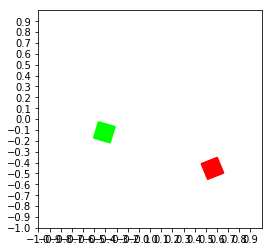

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.54158484  0.86653476  0.79448832]
[[  5.97815503e-01  -2.88982753e-01   6.56714306e-01  -4.26935394e-01
    5.18761666e-01  -4.85834197e-01   4.59862863e-01  -3.47881556e-01
   -2.91269948e-03   6.67894727e-02  -8.66837768e-05   6.80305674e-02
    1.15441086e-03   6.52045517e-02  -1.67160484e-03   6.39634570e-02
   -4.59863345e-01  -2.82980511e-02  -3.16221892e-01  -7.15083864e-02
   -3.59432227e-01  -2.15149839e-01  -5.03073680e-01  -1.71939504e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.05767885e+00  -2.60684702e-01   9.72936198e-01  -3.55427007e-01
    8.78193893e-01  -2.70684358e-01   9.62936543e-01  -1.75942053e-01]
 [  5.94902804e-01  -2.22193280e-01   6.56627622e-01  -3.58904826e-01
    5.19916077e-01  -4.20629645e-01   4.58191258e-01  -2.83918099e-01
   -2.92857447e-03   6.67474629e-02  -1

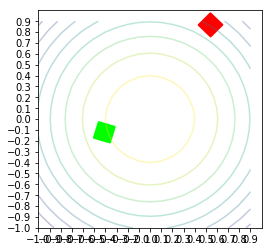

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.49951228 -0.69036695  0.15960644]
[[  5.96946507e-01  -2.69012596e-01   6.56692776e-01  -4.06600325e-01
    5.19105046e-01  -4.66346594e-01   4.59358777e-01  -3.28758864e-01
   -7.08357161e-03   1.61448858e-01  -3.12292535e-04   1.64591745e-01
    2.83059409e-03   1.57820466e-01  -3.94068498e-03   1.54677579e-01
   -4.59863345e-01  -2.82980511e-02  -3.16221892e-01  -7.15083864e-02
   -3.59432227e-01  -2.15149839e-01  -5.03073680e-01  -1.71939504e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.05680985e+00  -2.40714545e-01   9.72914668e-01  -3.35091939e-01
    8.78537273e-01  -2.51196755e-01   9.62432457e-01  -1.56819360e-01]
 [  5.89862936e-01  -1.07563737e-01   6.56380483e-01  -2.42008580e-01
    5.21935640e-01  -3.08526128e-01   4.55418092e-01  -1.74081285e-01
   -7.16769270e-03   1.61199987e-01  -5

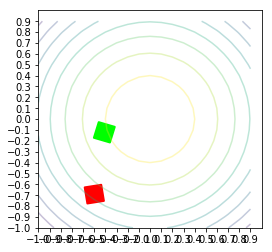

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.41131718 -0.26221855  0.36441135]
[[  5.89942178e-01  -1.09357398e-01   6.56385316e-01  -2.43839030e-01
    5.21903683e-01  -3.10282168e-01   4.55460545e-01  -1.75800536e-01
   -9.44131329e-03   2.11962371e-01  -7.86591364e-04   2.16596741e-01
    3.84777895e-03   2.07942019e-01  -4.80694298e-03   2.03307649e-01
   -4.59863345e-01  -2.82980511e-02  -3.16221892e-01  -7.15083864e-02
   -3.59432227e-01  -2.15149839e-01  -5.03073680e-01  -1.71939504e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.04980552e+00  -8.10593469e-02   9.72607208e-01  -1.72330644e-01
    8.81335911e-01  -9.51323292e-02   9.58534225e-01  -3.86103226e-03]
 [  5.80500864e-01   1.02604973e-01   6.55598724e-01  -2.72422891e-02
    5.25751462e-01  -1.02340149e-01   4.50653602e-01   2.75071128e-02
   -9.55857629e-03   2.11523417e-01  -1

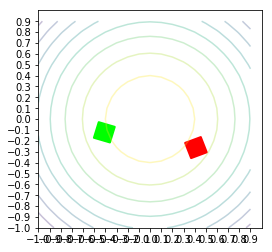

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.41131718 -0.26221855  0.36441135]
[[  5.89942178e-01  -1.09357398e-01   6.56385316e-01  -2.43839030e-01
    5.21903683e-01  -3.10282168e-01   4.55460545e-01  -1.75800536e-01
   -9.44131329e-03   2.11962371e-01  -7.86591364e-04   2.16596741e-01
    3.84777895e-03   2.07942019e-01  -4.80694298e-03   2.03307649e-01
   -4.59863345e-01  -2.82980511e-02  -3.16221892e-01  -7.15083864e-02
   -3.59432227e-01  -2.15149839e-01  -5.03073680e-01  -1.71939504e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.04980552e+00  -8.10593469e-02   9.72607208e-01  -1.72330644e-01
    8.81335911e-01  -9.51323292e-02   9.58534225e-01  -3.86103226e-03]
 [  5.80500864e-01   1.02604973e-01   6.55598724e-01  -2.72422891e-02
    5.25751462e-01  -1.02340149e-01   4.50653602e-01   2.75071128e-02
   -9.55857629e-03   2.11523417e-01  -1

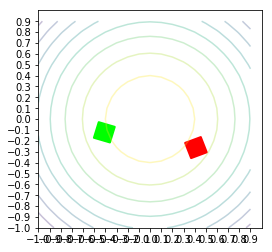

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.41131718 -0.26221855  0.36441135]
[[  5.89942178e-01  -1.09357398e-01   6.56385316e-01  -2.43839030e-01
    5.21903683e-01  -3.10282168e-01   4.55460545e-01  -1.75800536e-01
   -9.44131329e-03   2.11962371e-01  -7.86591364e-04   2.16596741e-01
    3.84777895e-03   2.07942019e-01  -4.80694298e-03   2.03307649e-01
   -4.59863345e-01  -2.82980511e-02  -3.16221892e-01  -7.15083864e-02
   -3.59432227e-01  -2.15149839e-01  -5.03073680e-01  -1.71939504e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.04980552e+00  -8.10593469e-02   9.72607208e-01  -1.72330644e-01
    8.81335911e-01  -9.51323292e-02   9.58534225e-01  -3.86103226e-03]
 [  5.80500864e-01   1.02604973e-01   6.55598724e-01  -2.72422891e-02
    5.25751462e-01  -1.02340149e-01   4.50653602e-01   2.75071128e-02
   -9.55857629e-03   2.11523417e-01  -1

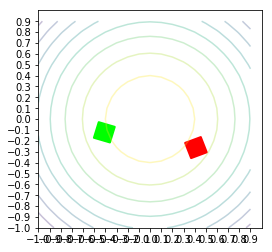

In [173]:
explorations[0].replay(verbose = True)

In [174]:
print (explorations[0].start_config)

for _, from_t, to_t, _, _, success, _, _ in explorations[0].action_storage:
    print (str(from_t) + " " + str(to_t) + " " + str(success) ) 

[Cube : [ 0.55916773 -0.45340549  0.38294344], Cube : [-0.40964779 -0.12172395  1.27858668]]
[ 0.55916773 -0.45340549  0.38294344] [ 0.54158484  0.86653476  0.79448832] True
[ 0.54158484  0.86653476  0.79448832] [-0.49951228 -0.69036695  0.15960644] True
[-0.49951228 -0.69036695  0.15960644] [ 0.41131718 -0.26221855  0.36441135] True
[ 0.41131718 -0.26221855  0.36441135] [ 0.41131718 -0.26221855  0.36441135] True
[ 0.41131718 -0.26221855  0.36441135] [ 0.41131718 -0.26221855  0.36441135] True


In [175]:
reload(block_movement_env)
a = block_movement_env.BlockMovementEnv(c, p.speed, progress_estimator = progress_estimator, session = sess)

In [178]:
a.test_case(a.bad_case_2)

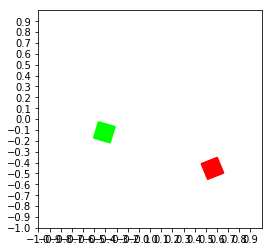

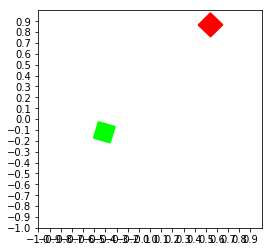

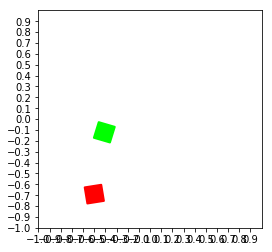

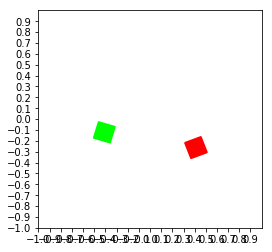

In [180]:
a.replay(verbose = False)

In [182]:
import numpy as np
a = np.zeros((2,3))

In [183]:
np.reshape(a, [-1])

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [184]:
a

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [185]:
a.shape

(2, 3)

In [186]:
a.shape[1:]

(3,)